# Logistic Regression 
## 1) Collecting Data 


In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
import math 
%matplotlib inline 



In [4]:
data= pd.read_csv(r"C:\Users\DELL\Downloads\datasets_11657_16098_train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2) Data analysis 


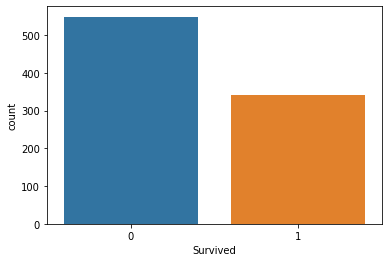

In [5]:
# In this step we will analysis the data by ploting graphs to know that which factor is co-related to our final result 
sns.countplot(x="Survived",data=data)

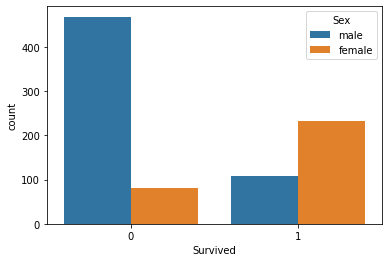

In [6]:
sns.countplot(x="Survived",hue="Sex",data=data)

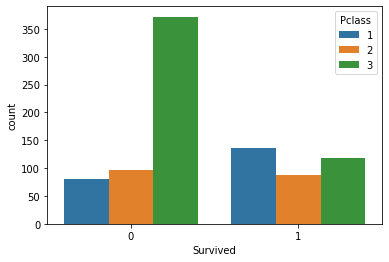

In [7]:
sns.countplot(x="Survived",hue="Pclass",data=data)

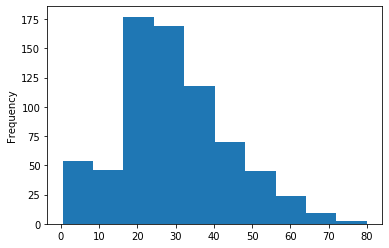

In [8]:
data["Age"].plot.hist()

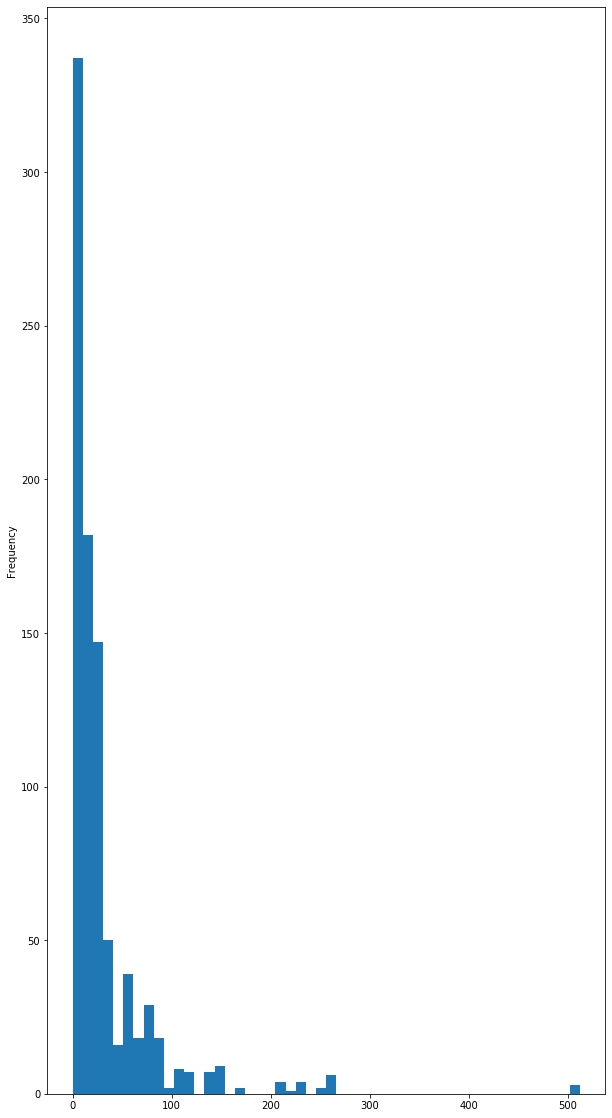

In [9]:
data["Fare"].plot.hist(bins=50,figsize=(10,20))
# Here bins is number of division between 2 points 


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


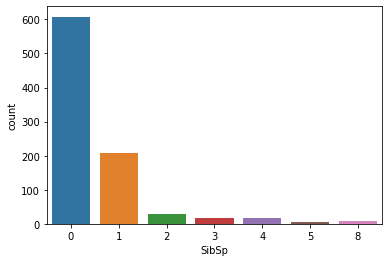

In [11]:
sns.countplot(x="SibSp",data=data)

## 3) Data wrangling 

In [12]:
# Here we will try to collect all the data which don"t have as value 
data.isnull()
# True= Null value 
# False = Non null value 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


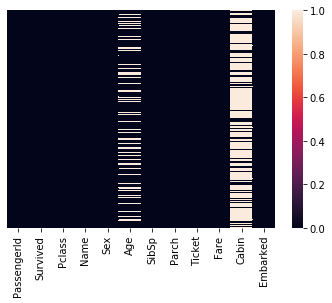

In [13]:
sns.heatmap(data.isnull(), yticklabels=False )

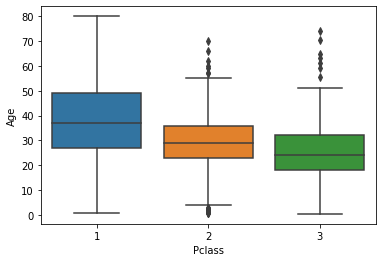

In [14]:
sns.boxplot(x="Pclass",y="Age",data=data)
# Here the boxes represents the minimun and maximum ages in each class and the middle line is showing the median of the data 

In [15]:
data.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
data.drop("Cabin",axis=1,inplace=True)
# Droping the column Cabin from the data 

In [17]:
# In the above statement inplace means that we editing the prsent the data set only 
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
data.dropna(inplace=True)
# Droping all the nulls values from the data 

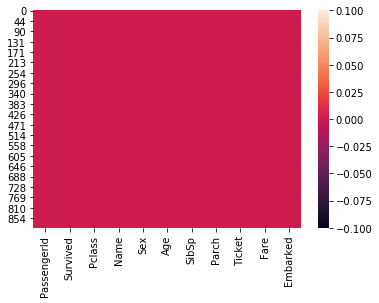

In [19]:
sns.heatmap(data.isnull())

In [20]:
# Now we will convert String data into categorical data meaning we will convert the data into binary format 
sex=pd.get_dummies(data["Sex"])
sex.head(5)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [21]:
# The data is now converted to binary format and now we can remove one column as we easily predict that by using a second column 
sex=pd.get_dummies(data["Sex"],drop_first=True)

In [22]:
embar=pd.get_dummies(data["Embarked"],drop_first=True)

In [23]:
cls=pd.get_dummies(data["Pclass"],drop_first=True)

In [24]:
data=pd.concat([data,sex,embar,cls],axis=1)
# Adding the above created colums to our data 


In [25]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [26]:
# Now we can remove the unnecessay columns from the data set 


In [27]:
data.drop(["Sex","Name","PassengerId","Age","Embarked"],axis=1,inplace=True )

In [28]:
data.head()

,Survived,Pclass,SibSp,Parch,Ticket,Fare,male,Q,S,2,3
0,0,3,1,0,A/5 21171,7.2500,1,0,1,0,1
1,1,1,1,0,PC 17599,71.2833,0,0,0,0,0
2,1,3,0,0,STON/O2. 3101282,7.9250,0,0,1,0,1
3,1,1,1,0,113803,53.1000,0,0,1,0,0
4,0,3,0,0,373450,8.0500,1,0,1,0,1


In [29]:
data.drop(["Ticket"],axis=1,inplace=True )

In [30]:
data.head()

,Survived,Pclass,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,1,0,7.2500,1,0,1,0,1
1,1,1,1,0,71.2833,0,0,0,0,0
2,1,3,0,0,7.9250,0,0,1,0,1
3,1,1,1,0,53.1000,0,0,1,0,0
4,0,3,0,0,8.0500,1,0,1,0,1


## 4) Training and testing data 

In [31]:
X=data.drop("Survived",axis=1)
y=data["Survived"]

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=1)

In [34]:
log=LogisticRegression()

In [35]:
log.fit(X_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
prediction=log.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [37]:
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.80      0.83      0.81       139\n           1       0.74      0.70      0.72        96\n\n    accuracy                           0.77       235\n   macro avg       0.77      0.76      0.76       235\nweighted avg       0.77      0.77      0.77       235\n'

In [45]:
confusion_matrix(y_test,prediction)


array([[115,  24],
       [ 29,  67]], dtype=int64)

## 5) Calculating the accurancy of the model 

In [46]:
from sklearn.metrics import *
accuracy_score(y_test,prediction)

0.774468085106383

In [47]:
# Here the accuracy of the model comes out to be almost 77% (which is quite good )